In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Example data (replace with your actual LFP data)
X = np.random.randn(1000, 500, 6)  # Shape: (samples, time_points, channels)
y = np.random.randn(1000)  # Target labels for LFP prediction

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_scaled, y, epochs=50, batch_size=32)

# Predict on new data
X_test = np.random.randn(200, 500, 6)  # Example test data
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mse = np.mean((y_pred - y[:len(y_pred)])**2)
print(f'Mean Squared Error: {mse}')

Epoch 1/50
32/32 [==============================] - 8s 206ms/step - loss: 1.0678
Epoch 2/50
32/32 [==============================] - 6s 188ms/step - loss: 1.0618
Epoch 3/50
32/32 [==============================] - 6s 189ms/step - loss: 1.0526
Epoch 4/50
32/32 [==============================] - 6s 191ms/step - loss: 1.0503
Epoch 5/50
32/32 [==============================] - 6s 188ms/step - loss: 1.0466
Epoch 6/50
32/32 [==============================] - 6s 193ms/step - loss: 1.0472
Epoch 7/50
32/32 [==============================] - 6s 198ms/step - loss: 1.0456
Epoch 8/50
32/32 [==============================] - 6s 185ms/step - loss: 1.0409
Epoch 9/50
32/32 [==============================] - 6s 187ms/step - loss: 1.0269
Epoch 10/50
32/32 [==============================] - 6s 190ms/step - loss: 1.0334
Epoch 11/50
32/32 [==============================] - 6s 187ms/step - loss: 1.0144
Epoch 12/50
32/32 [==============================] - 6s 185ms/step - loss: 1.0112
Epoch 13/50
32/32 [======

In [115]:
import pickle

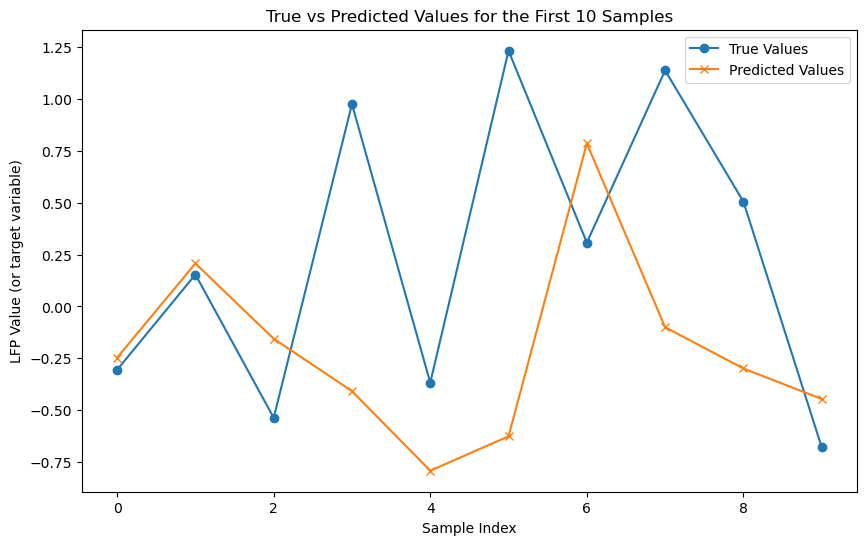

Mean Squared Error: 1.849604718951168


In [6]:
import matplotlib.pyplot as plt

# True values (for evaluation, replace with actual test labels)
y_true = y

# Plot the first few predictions and true values
plt.figure(figsize=(10, 6))
plt.plot(y_true[:10], label='True Values', marker='o')
plt.plot(y_pred[:10], label='Predicted Values', marker='x')
plt.title("True vs Predicted Values for the First 10 Samples")
plt.xlabel("Sample Index")
plt.ylabel("LFP Value (or target variable)")
plt.legend()
plt.show()

# Optionally, plot the MSE over time (or a single sample)
mse = np.mean((y_pred - y_true)**2)
print(f'Mean Squared Error: {mse}')

7/7 [==============================] - 0s 44ms/step


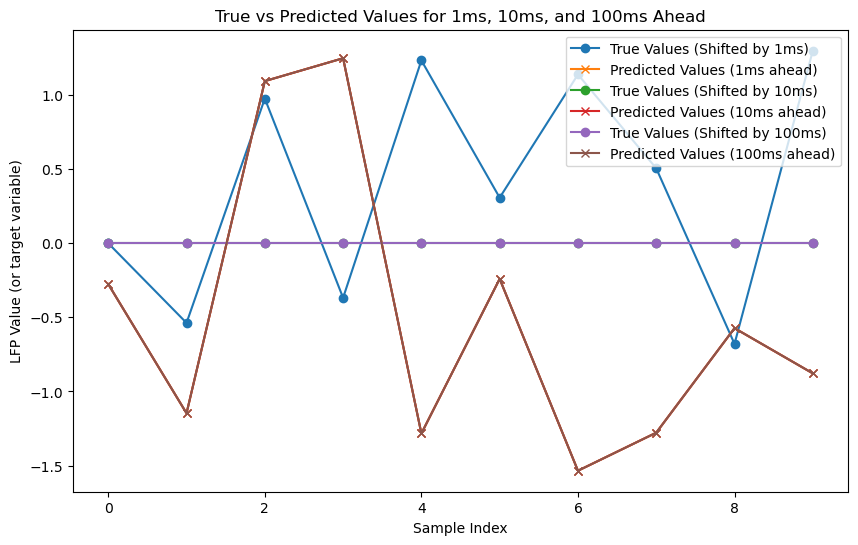

In [7]:
import matplotlib.pyplot as plt

# Example test data (replace with actual data)
X_test = np.random.randn(200, 500, 6)  # Test data
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Predictions from the model
y_pred = model.predict(X_test_scaled)

# Shifted true values for different time frames
timeframes = [1, 10, 100]  # in milliseconds (or any other unit depending on your data)

# Plot for different time frames
plt.figure(figsize=(10, 6))

for t in timeframes:
    # Shift the target values for the corresponding time frame
    shifted_y_true = np.roll(y_true, -t)  # Shift values by `t`
    shifted_y_true[:t] = 0  # Set the first `t` values to 0 (or another value)

    # Plot true vs predicted for the shifted time frame
    plt.plot(shifted_y_true[:10], label=f'True Values (Shifted by {t}ms)', marker='o')
    plt.plot(y_pred[:10], label=f'Predicted Values ({t}ms ahead)', marker='x')

plt.title("True vs Predicted Values for 1ms, 10ms, and 100ms Ahead")
plt.xlabel("Sample Index")
plt.ylabel("LFP Value (or target variable)")
plt.legend()
plt.show()

# Real data

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import mne
import pickle

# from gait_modulation.file_reader import MatFileReader
# from gait_modulation.data_processor import DataProcessor
# from gait_modulation.viz import Visualise
# from gait_modulation.feature_extractor import FeatureExtractor


In [7]:
with open('processed/all_lfp_data.pkl', 'rb') as f:
    all_lfp_data = pickle.load(f)

In [8]:
max_length = 38213  # Define the maximum length for each trial
n_sessions = len(all_lfp_data)
raw_data = []

for s in range(n_sessions):
    session = all_lfp_data[f'session_{s}']  # Access specific patient/session

    # Cut or pad trials to the desired length
    lfp_data = lfp_data[:, 0:max_length] #for trial in lfp_data]  # Truncate to max_length
    # lfp_data = [np.pad(trial, ((0, 0), (0, max_length - trial.shape[1])), mode='constant') if trial.shape[1] < max_length else trial for trial in lfp_data]
    
    raw_data.append(lfp_data)

# Optionally, concatenate all sessions' data
# X_raw = np.concatenate(raw_data, axis=0)
X_raw = np.transpose(np.array(raw_data), (0, 2, 1))
X_raw.shape

NameError: name 'lfp_data' is not defined

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming `X_raw` is your data with shape (n_samples, n_time_points, n_channels)

# Preprocessing (scaling the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw.reshape(-1, X_raw.shape[2])).reshape(X_raw.shape)

# Split into training and test sets (80/20)
n_train = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:n_train], X_scaled[n_train:]
y_train, y_test = X_train, X_test  # Assuming you want to predict the LFP values themselves

# Define LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),  # Change to return sequences
    Dropout(0.2),
    Dense(1)  # Each timestep has one output value
])


# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict on test data
y_pred = model.predict(X_test)

# Example: Evaluate performance with MSE
mse = np.mean((y_pred - y_test)**2)
print(f'Mean Squared Error: {mse}')

Epoch 1/50
1/1 [==============================] - 61s 61s/step - loss: 1.2638
Epoch 2/50
1/1 [==============================] - 57s 57s/step - loss: 1.1462
Epoch 3/50
1/1 [==============================] - 57s 57s/step - loss: 1.0739
Epoch 4/50
1/1 [==============================] - 58s 58s/step - loss: 1.0385
Epoch 5/50
1/1 [==============================] - 59s 59s/step - loss: 1.0273
Epoch 6/50
1/1 [==============================] - 58s 58s/step - loss: 1.0238
Epoch 7/50
1/1 [==============================] - 59s 59s/step - loss: 1.0163
Epoch 8/50
1/1 [==============================] - 60s 60s/step - loss: 1.0041
Epoch 9/50
1/1 [==============================] - 58s 58s/step - loss: 0.9900
Epoch 10/50
1/1 [==============================] - 57s 57s/step - loss: 0.9772
Epoch 11/50
1/1 [==============================] - 56s 56s/step - loss: 0.9675
Epoch 12/50
1/1 [==============================] - 56s 56s/step - loss: 0.9610
Epoch 13/50
1/1 [==============================] - 56s 56s/st

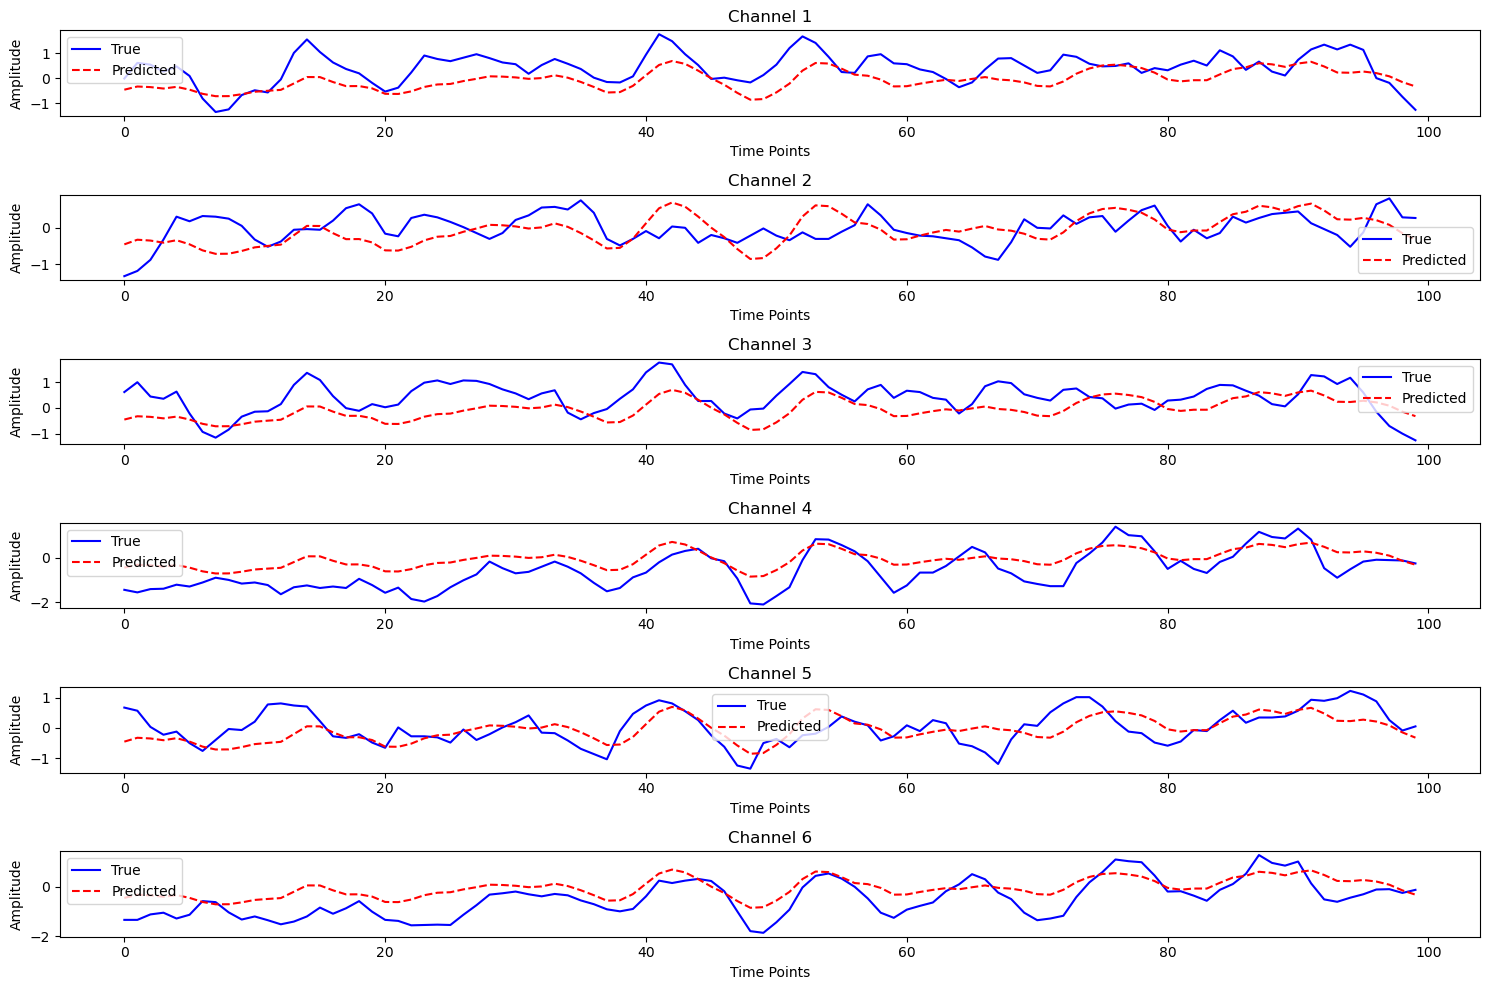

In [114]:
import matplotlib.pyplot as plt

# Select a sample from the test set to visualize
sample_index = 0
y_true_sample = y_test[sample_index][20000:20100] # True values for the chosen sample
y_pred_sample = y_pred[sample_index][20000:20100] # Predicted values for the same sample

# Plot true vs. predicted values for each channel
n_channels = X_train.shape[2]
time_points = range(y_true_sample.shape[0])

plt.figure(figsize=(15, 10))
for ch in range(n_channels):
    plt.subplot(n_channels, 1, ch + 1)
    plt.plot(time_points, y_true_sample[:, ch], label='True', color='b')
    plt.plot(time_points, y_pred_sample[:], label='Predicted', color='r', linestyle='--')
    plt.title(f'Channel {ch + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

In [11]:
epochs = mne.read_epochs('processd/lfp_epo.fif')
epochs.get_data(copy=False).shape

Reading /Users/orabe/Library/Mobile Documents/com~apple~CloudDocs/0_TU/Master/master_thesis/gait_modulation/processd/lfp_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2000.00 ...       0.00 ms
        0 CTF compensation matrices available
Not setting metadata
757 matching events found
No baseline correction applied
0 projection items activated


(757, 6, 501)

In [19]:
np.transpose(epochs.get_data(copy=False), (0, 2, 1)).shape

(757, 501, 6)

# LSTM with epoched time series

Epoch 1/50
19/19 [==============================] - 10s 427ms/step - loss: 0.0052
Epoch 2/50
19/19 [==============================] - 7s 360ms/step - loss: 0.0018
Epoch 3/50
19/19 [==============================] - 7s 350ms/step - loss: 0.0011
Epoch 4/50
19/19 [==============================] - 7s 352ms/step - loss: 6.0466e-04
Epoch 5/50
19/19 [==============================] - 7s 347ms/step - loss: 4.8527e-04
Epoch 6/50
19/19 [==============================] - 7s 353ms/step - loss: 3.4440e-04
Epoch 7/50
19/19 [==============================] - 7s 356ms/step - loss: 3.4599e-04
Epoch 8/50
19/19 [==============================] - 7s 348ms/step - loss: 3.1128e-04
Epoch 9/50
19/19 [==============================] - 7s 372ms/step - loss: 2.5482e-04
Epoch 10/50
19/19 [==============================] - 7s 363ms/step - loss: 1.9274e-04
Epoch 11/50
19/19 [==============================] - 7s 382ms/step - loss: 1.7825e-04
Epoch 12/50
19/19 [==============================] - 7s 389ms/step - loss:

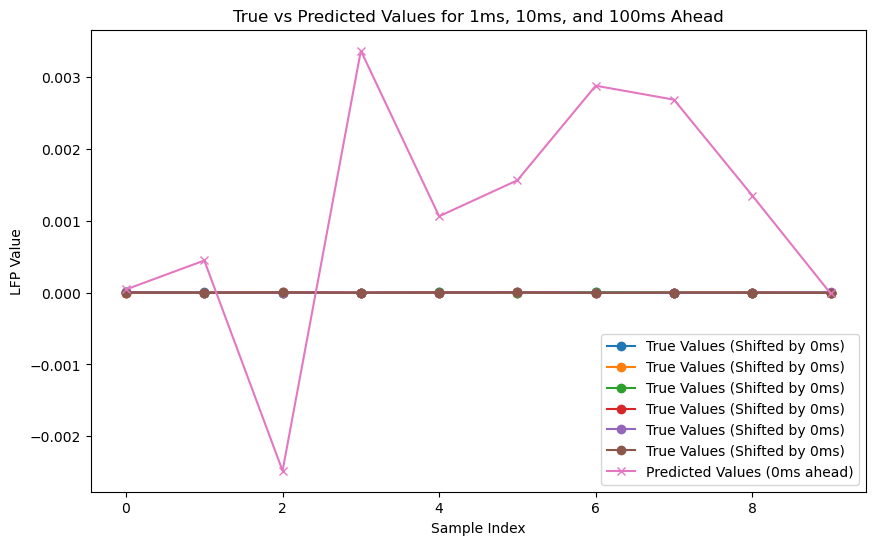

Mean Squared Error: 1.8006085407528927e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data from an mne.Epochs object (replace with your actual data)
X = np.transpose(epochs.get_data(copy=True), (0, 2, 1))#(n_epochs, n_times, n_channels)
# y = epochs.events[:, 2]  # Assuming the labels are in the events column
y = X[:, -1, :] # True LFP values (regression target)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)

# Split into training and testing data (for simplicity, split 80/20)
n_train = int(0.8 * len(X))
X_train, X_test = X_scaled[:n_train], X_scaled[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # For regression (continuous output)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict on test data
y_pred = model.predict(X_test)

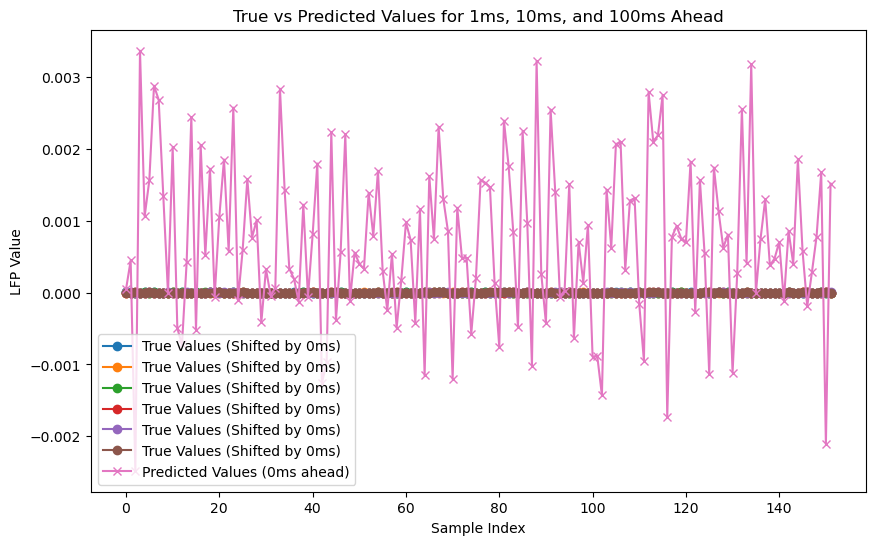

Mean Squared Error: 1.8006085407528927e-06


In [53]:
# Plot predictions for different future time frames (1ms, 10ms, 100ms)
timeframes = [0]  # Time frames in milliseconds

# Create a plot for each time frame
plt.figure(figsize=(10, 6))

for t in timeframes:
    # Shift true values by time `t` (predict future LFP values)
    shifted_y_true = np.roll(y_test, -t)
    shifted_y_true[:t] = 0  # Zero padding for the first `t` values

    # # Plot true vs predicted values for the shifted time frame
    plt.plot(shifted_y_true[:], label=f'True Values (Shifted by {t}ms)', marker='o')
    plt.plot(y_pred[:], label=f'Predicted Values ({t}ms ahead)', marker='x')

plt.title("True vs Predicted Values for 1ms, 10ms, and 100ms Ahead")
plt.xlabel("Sample Index")
plt.ylabel("LFP Value")
plt.legend()
plt.show()

# Calculate MSE
mse = np.mean((y_pred - y_test)**2)
print(f'Mean Squared Error: {mse}')

In [44]:
shifted_y_true[100].shape

y_test.shape, y_pred.shape, np.roll(y_test, -t).shape

((152, 6), (152, 1), (152, 6))